In [1]:
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor 
import pywt
import numpy as np

In [2]:
def modwt(row, wavelet_family, level):
    # Extract the signal from the 'PPG_F' column
    signal = row['PPG_F']

    # Perform MODWT using 'per' (periodization) mode
    coeffs = pywt.wavedec(signal, wavelet_family, level=level, mode='per')
    return coeffs



In [3]:
df=pd.read_csv("Work_Done/alldata.csv")

In [4]:
df.head()

,ABP_F,ABP_Lag,ABP_Raw,ABP_SPeaks,ABP_Turns,Age,CaseID,ECG_F,ECG_RPeaks,ECG_Raw,...,PPG_Raw,PPG_SPeaks,PPG_Turns,SegDBP,SegSBP,SegmentID,SubjectID,WinID,WinSeqID,File
0,"[0.6372406954454819, 0.6963681510833141, 0.751...",44,"[107.1708651700555, 112.84231606409129, 117.53...","[35.0, 96.0, 211.0, 274.0, 388.0, 453.0, 566.0...","[75.0, 166.0, 254.0, 342.0, 430.0, 522.0, 611....",71,50,"[0.9714378515157602, 0.9744721562070329, 0.964...","[48.0, 139.0, 226.0, 316.0, 406.0, 496.0, 586....","[0.9558823529411763, 0.9588235294117645, 0.948...",...,"[0.2780269058295964, 0.2780269058295964, 0.275...","[79.0, 141.0, 254.0, 318.0, 432.0, 496.0, 610....","[29.0, 121.0, 205.0, 300.0, 380.0, 476.0, 562....",46.377382,121.559029,145,112,145,145,Copie de p083128.mat
1,"[0.9094232573693449, 0.9013211960165176, 0.886...",43,"[126.53202511866043, 126.14089057424417, 125.5...","[25.0, 88.0, 200.0, 264.0, 377.0, 443.0, 559.0...","[66.0, 156.0, 242.0, 333.0, 421.0, 514.0, 603....",71,50,"[0.7182868506375588, 0.695790051174192, 0.6775...","[41.0, 129.0, 217.0, 306.0, 396.0, 487.0, 577....","[0.6976047904191617, 0.6781437125748503, 0.658...",...,"[0.3194444444444444, 0.3171296296296296, 0.314...","[69.0, 131.0, 244.0, 308.0, 421.0, 487.0, 602....","[20.0, 112.0, 195.0, 288.0, 371.0, 467.0, 554....",45.609082,121.014234,147,112,147,147,Copie de p083128.mat
2,"[0.664764956291844, 0.6666600495263026, 0.6747...",44,"[107.1708651700555, 109.32210516434495, 114.21...","[15.0, 77.0, 191.0, 261.0, 366.0, 433.0, 542.0...","[56.0, 147.0, 235.0, 321.0, 404.0, 498.0, 586....",71,50,"[0.6466282417708343, 0.6457386651875736, 0.648...","[31.0, 121.0, 210.0, 296.0, 384.0, 472.0, 563....","[0.6415929203539823, 0.6415929203539823, 0.641...",...,"[0.2466367713004483, 0.2421524663677129, 0.242...","[60.0, 123.0, 236.0, 303.0, 411.0, 475.0, 588....","[11.0, 104.0, 188.0, 284.0, 362.0, 455.0, 540....",43.653409,126.112952,149,112,149,149,Copie de p083128.mat
3,"[0.974419902163117, 0.9700609329062179, 0.9611...",40,"[138.85276326777264, 138.26606145114826, 136.7...","[1.0, 63.0, 175.0, 239.0, 350.0, 413.0, 526.0,...","[43.0, 131.0, 218.0, 307.0, 393.0, 482.0, 569....",71,50,"[0.7124561096736174, 0.7106859790709499, 0.695...","[17.0, 105.0, 193.0, 281.0, 368.0, 456.0, 544....","[0.6969253294289898, 0.6925329428989752, 0.682...",...,"[0.3353057199211045, 0.3550295857988165, 0.382...","[44.0, 105.0, 218.0, 281.0, 393.0, 456.0, 568....","[86.0, 169.0, 262.0, 344.0, 438.0, 519.0, 615....",48.766096,127.340370,150,112,150,150,Copie de p083128.mat
4,"[0.6795098388454232, 0.6582949001184687, 0.636...",40,"[108.3442688033043, 104.04178881472542, 100.71...","[44.0, 155.0, 218.0, 329.0, 399.0, 510.0, 574....","[26.0, 112.0, 199.0, 285.0, 372.0, 466.0, 553....",71,50,"[0.166648715211792, 0.14214650599837164, 0.101...","[86.0, 173.0, 259.0, 352.0, 439.0, 528.0, 615....","[0.21399176954732513, 0.16186556927297668, 0.1...",...,"[0.6584440227703985, 0.648956356736243, 0.6375...","[22.0, 87.0, 197.0, 261.0, 370.0, 439.0, 552.0...","[69.0, 149.0, 242.0, 322.0, 417.0, 503.0, 596....",47.089805,124.101403,151,112,151,151,Copie de p083128.mat


In [5]:
needed_df=df.iloc[:,[5,10,13,14,17,18]]

In [6]:
needed_df.head()

,Age,Gender,PPG_F,PPG_Raw,SegDBP,SegSBP
0,71,70,"[0.27869738609695127, 0.27751010262657366, 0.2...","[0.2780269058295964, 0.2780269058295964, 0.275...",46.377382,121.559029
1,71,70,"[0.268542259689318, 0.2642597844444565, 0.2603...","[0.3194444444444444, 0.3171296296296296, 0.314...",45.609082,121.014234
2,71,70,"[0.25674629533276566, 0.25176688534194613, 0.2...","[0.2466367713004483, 0.2421524663677129, 0.242...",43.653409,126.112952
3,71,70,"[0.28681599817478715, 0.309976227746618, 0.337...","[0.3353057199211045, 0.3550295857988165, 0.382...",48.766096,127.340370
4,71,70,"[0.740290884289208, 0.7243887635779741, 0.7084...","[0.6584440227703985, 0.648956356736243, 0.6375...",47.089805,124.101403


In [7]:
needed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      1002 non-null   int64  
 1   Gender   1002 non-null   int64  
 2   PPG_F    1002 non-null   object 
 3   PPG_Raw  1002 non-null   object 
 4   SegDBP   1002 non-null   float64
 5   SegSBP   1002 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 47.1+ KB


In [8]:
type(needed_df["PPG_F"][0])

str

In [9]:
from ast import literal_eval
needed_df["PPG_F"]=needed_df['PPG_F'].apply(literal_eval)
needed_df["PPG_Raw"]=needed_df["PPG_Raw"].apply(literal_eval)

C:\Users\ridha\AppData\Local\Temp\ipykernel_7812\4254609452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  needed_df["PPG_F"]=needed_df['PPG_F'].apply(literal_eval)
C:\Users\ridha\AppData\Local\Temp\ipykernel_7812\4254609452.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  needed_df["PPG_Raw"]=needed_df["PPG_Raw"].apply(literal_eval)


In [10]:
print(len(needed_df["PPG_F"][0]))

1250


In [11]:
# Check if all PPG arrays have the same length
ppg_lengths = needed_df['PPG_F'].apply(len)
are_lengths_equal = all(ppg_lengths == ppg_lengths.iloc[0])

if are_lengths_equal:
    print("All PPG arrays have the same length.")
else:
    print("PPG arrays have different lengths.")

All PPG arrays have the same length.


In [12]:
needed_df["PPG_MODWT"] = needed_df.apply(lambda row: modwt(row, "sym4", 4), axis=1)

C:\Users\ridha\AppData\Local\Temp\ipykernel_7812\266026781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  needed_df["PPG_MODWT"] = needed_df.apply(lambda row: modwt(row, "sym4", 4), axis=1)


In [13]:
needed_df.head()

,Age,Gender,PPG_F,PPG_Raw,SegDBP,SegSBP,PPG_MODWT
0,71,70,"[0.27869738609695127, 0.27751010262657366, 0.2...","[0.2780269058295964, 0.2780269058295964, 0.275...",46.377382,121.559029,"[[0.7978501463469988, 0.9717046748636683, 2.87..."
1,71,70,"[0.268542259689318, 0.2642597844444565, 0.2603...","[0.3194444444444444, 0.3171296296296296, 0.314...",45.609082,121.014234,"[[0.7279940229145544, 2.143085952949365, 2.775..."
2,71,70,"[0.25674629533276566, 0.25176688534194613, 0.2...","[0.2466367713004483, 0.2421524663677129, 0.242...",43.653409,126.112952,"[[1.2863113543787998, 2.841403185606481, 2.940..."
3,71,70,"[0.28681599817478715, 0.309976227746618, 0.337...","[0.3353057199211045, 0.3550295857988165, 0.382...",48.766096,127.340370,"[[2.7822417217024813, 3.034466079882996, 3.495..."
4,71,70,"[0.740290884289208, 0.7243887635779741, 0.7084...","[0.6584440227703985, 0.648956356736243, 0.6375...",47.089805,124.101403,"[[3.3894428353933197, 3.0003384062645773, 1.98..."


In [14]:
needed_df.isna().sum()

Age          0
Gender       0
PPG_F        0
PPG_Raw      0
SegDBP       0
SegSBP       0
PPG_MODWT    0
dtype: int64

In [15]:
type(needed_df["PPG_MODWT"])

pandas.core.series.Series

In [16]:
needed_df["first_sublist_modwt"]=needed_df['PPG_MODWT'].apply(lambda x: x[0])

C:\Users\ridha\AppData\Local\Temp\ipykernel_7812\2374515527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  needed_df["first_sublist_modwt"]=needed_df['PPG_MODWT'].apply(lambda x: x[0])


In [17]:
needed_df.head()

,Age,Gender,PPG_F,PPG_Raw,SegDBP,SegSBP,PPG_MODWT,first_sublist_modwt
0,71,70,"[0.27869738609695127, 0.27751010262657366, 0.2...","[0.2780269058295964, 0.2780269058295964, 0.275...",46.377382,121.559029,"[[0.7978501463469988, 0.9717046748636683, 2.87...","[0.7978501463469988, 0.9717046748636683, 2.873..."
1,71,70,"[0.268542259689318, 0.2642597844444565, 0.2603...","[0.3194444444444444, 0.3171296296296296, 0.314...",45.609082,121.014234,"[[0.7279940229145544, 2.143085952949365, 2.775...","[0.7279940229145544, 2.143085952949365, 2.7755..."
2,71,70,"[0.25674629533276566, 0.25176688534194613, 0.2...","[0.2466367713004483, 0.2421524663677129, 0.242...",43.653409,126.112952,"[[1.2863113543787998, 2.841403185606481, 2.940...","[1.2863113543787998, 2.841403185606481, 2.9403..."
3,71,70,"[0.28681599817478715, 0.309976227746618, 0.337...","[0.3353057199211045, 0.3550295857988165, 0.382...",48.766096,127.340370,"[[2.7822417217024813, 3.034466079882996, 3.495...","[2.7822417217024813, 3.034466079882996, 3.4952..."
4,71,70,"[0.740290884289208, 0.7243887635779741, 0.7084...","[0.6584440227703985, 0.648956356736243, 0.6375...",47.089805,124.101403,"[[3.3894428353933197, 3.0003384062645773, 1.98...","[3.3894428353933197, 3.0003384062645773, 1.981..."


In [33]:
# Define a function to filter rows and expand the lists into columns, keeping only the first 50 values
def expand_list(row):
    num_columns = 50  # Specify the number of columns to keep
    if len(row['first_sublist_modwt']) >= num_columns:
        return pd.Series(row['first_sublist_modwt'][:num_columns])
    else:
        return pd.Series([None] * num_columns)

# Apply the function to create new columns
df_expanded = needed_df.apply(expand_list, axis=1)
# Rename the new columns as needed
df_expanded.columns =[f'first_sublist_modwt_{i}' for i in range(1, len(df_expanded.columns) + 1)]
# Filter out rows where 'Values' has fewer than 50 values
df_result = needed_df[needed_df['first_sublist_modwt'].apply(len) >= 50]

# Concatenate the new columns with the filtered DataFrame
df_result = pd.concat([df_result, df_expanded], axis=1)

# Drop the original 'Values' column if needed
df_result = df_result.drop('first_sublist_modwt', axis=1)

In [34]:
df_result.columns

Index(['Age', 'Gender', 'PPG_F', 'PPG_Raw', 'SegDBP', 'SegSBP', 'PPG_MODWT',
       'first_sublist_modwt_1', 'first_sublist_modwt_2',
       'first_sublist_modwt_3', 'first_sublist_modwt_4',
       'first_sublist_modwt_5', 'first_sublist_modwt_6',
       'first_sublist_modwt_7', 'first_sublist_modwt_8',
       'first_sublist_modwt_9', 'first_sublist_modwt_10',
       'first_sublist_modwt_11', 'first_sublist_modwt_12',
       'first_sublist_modwt_13', 'first_sublist_modwt_14',
       'first_sublist_modwt_15', 'first_sublist_modwt_16',
       'first_sublist_modwt_17', 'first_sublist_modwt_18',
       'first_sublist_modwt_19', 'first_sublist_modwt_20',
       'first_sublist_modwt_21', 'first_sublist_modwt_22',
       'first_sublist_modwt_23', 'first_sublist_modwt_24',
       'first_sublist_modwt_25', 'first_sublist_modwt_26',
       'first_sublist_modwt_27', 'first_sublist_modwt_28',
       'first_sublist_modwt_29', 'first_sublist_modwt_30',
       'first_sublist_modwt_31', 'first_sublist

In [35]:
df_result=df_result.drop(['PPG_F', 'PPG_Raw','PPG_MODWT'],axis=1)

In [36]:
df_result.head()

,Age,Gender,SegDBP,SegSBP,first_sublist_modwt_1,first_sublist_modwt_2,first_sublist_modwt_3,first_sublist_modwt_4,first_sublist_modwt_5,first_sublist_modwt_6,...,first_sublist_modwt_41,first_sublist_modwt_42,first_sublist_modwt_43,first_sublist_modwt_44,first_sublist_modwt_45,first_sublist_modwt_46,first_sublist_modwt_47,first_sublist_modwt_48,first_sublist_modwt_49,first_sublist_modwt_50
0,71,70,46.377382,121.559029,0.797850,0.971705,2.873259,2.817043,3.776417,2.587078,...,0.295037,2.154622,1.946146,1.431589,1.063471,0.653705,1.354146,2.723675,3.316052,3.317680
1,71,70,45.609082,121.014234,0.727994,2.143086,2.775531,3.527936,2.976307,1.537886,...,1.129864,2.208030,1.546496,1.302718,0.985753,0.733773,2.483317,2.771106,3.655232,2.746641
2,71,70,43.653409,126.112952,1.286311,2.841403,2.940335,3.373780,2.286908,0.817190,...,2.467908,1.691995,1.377834,1.066377,0.985539,2.645655,2.854312,3.685040,2.481924,0.886251
3,71,70,48.766096,127.340370,2.782242,3.034466,3.495211,2.442765,0.632401,1.578207,...,1.626470,1.470332,1.031277,1.673895,2.694070,3.214722,3.226372,2.267704,0.671558,1.545881
4,71,70,47.089805,124.101403,3.389443,3.000338,1.981835,0.851529,1.697138,1.701621,...,1.196761,0.800099,1.830816,2.777316,3.377391,3.120822,1.909031,0.157546,2.062079,2.191829


In [37]:
X=df_result.drop(["SegDBP","SegSBP"],axis=1)
y=df_result[["SegDBP","SegSBP"]]


In [38]:
y.head()

,SegDBP,SegSBP
0,46.377382,121.559029
1,45.609082,121.014234
2,43.653409,126.112952
3,48.766096,127.340370
4,47.089805,124.101403


In [39]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
tree1=DecisionTreeRegressor()
tree2=DecisionTreeRegressor()

In [41]:
tree1.fit(X_train,y_train["SegDBP"])
tree2.fit(X_train,y_train["SegSBP"])

DecisionTreeRegressor()

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
print(mean_squared_error(y_test['SegDBP'],tree1.predict(X_test),squared=False))
print(mean_squared_error(y_test['SegSBP'],tree2.predict(X_test),squared=False))

7.868104069647171
18.52716440842946


# Correlation 

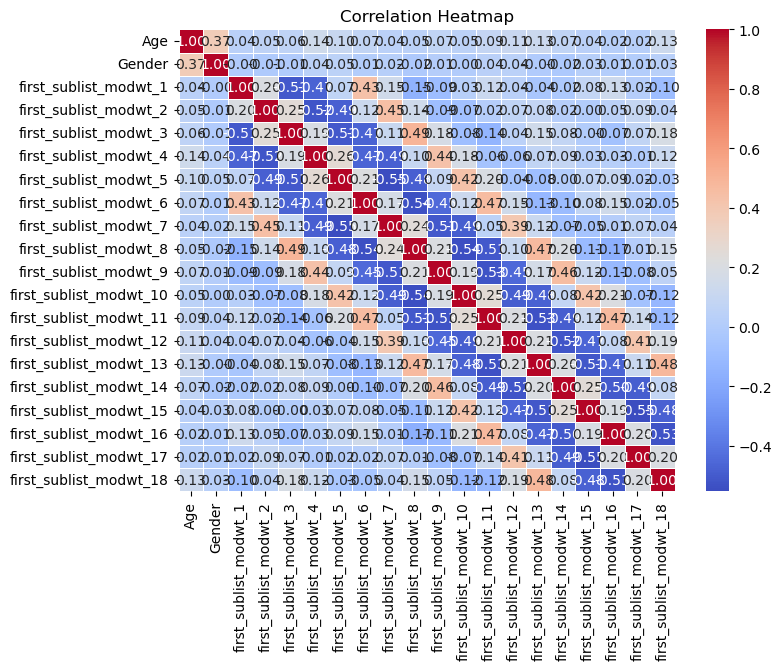

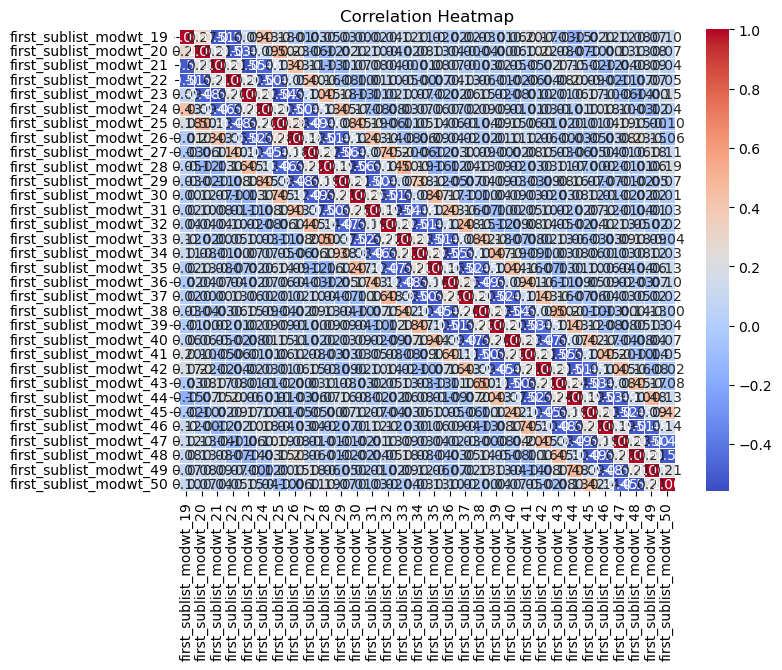

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = X.iloc[:,:20].corr()
correlation_matrix2=X.iloc[:,20:].corr()
# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Correlation Analysis is not so useful 

# Now Using PCA

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [53]:
n_components = 25

# Create PCA instance
pca = PCA(n_components=n_components)

# Fit and transform the data
X_pca = pca.fit_transform(X_scaled)

In [54]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance:", explained_variance)

Explained Variance: [0.08980816 0.08376259 0.07950918 0.0741912  0.07234643 0.06450859
 0.06116476 0.04784222 0.04409299 0.04012222 0.03504064 0.03121558
 0.02547396 0.02269374 0.021369   0.02114428 0.01648225 0.01479865
 0.01054112 0.01040213 0.00925377 0.00772589 0.00742978 0.00736993
 0.00700716]


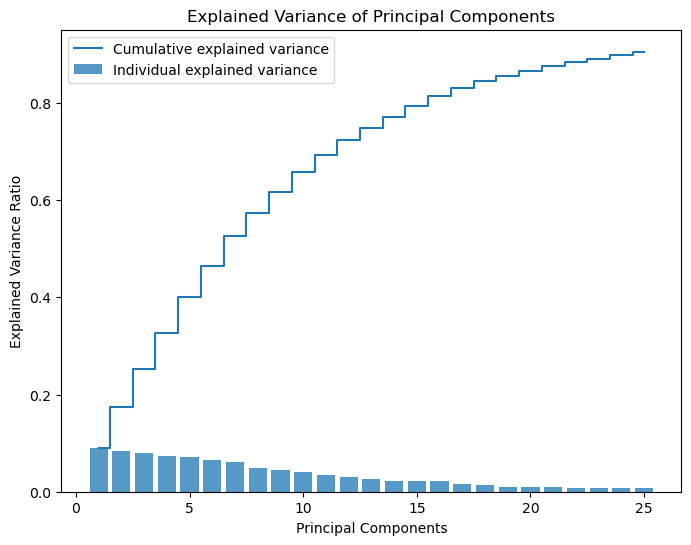

In [55]:
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.75, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance of Principal Components')
plt.legend()
plt.show()

In [56]:
X_pca_train,X_pca_test,y_train,y_test=train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [67]:
tree3=DecisionTreeRegressor(max_depth=10)
tree4=DecisionTreeRegressor(max_depth=10)
tree3.fit(X_pca_train,y_train["SegDBP"])
tree4.fit(X_pca_train,y_train["SegSBP"])

DecisionTreeRegressor(max_depth=10)

In [68]:
print(mean_squared_error(y_test['SegDBP'],tree3.predict(X_pca_test),squared=False))
print(mean_squared_error(y_test['SegSBP'],tree4.predict(X_pca_test),squared=False))

10.329129582959466
21.443526410764402


In [65]:
import xgboost as xgb

# Assuming X_pca_train and y_train are already defined

# For SegDBP
xg_reg_dbp = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 50)
xg_reg_dbp.fit(X_pca_train, y_train["SegDBP"])

# For SegSBP
xg_reg_sbp = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 50)
xg_reg_sbp.fit(X_pca_train, y_train["SegSBP"])


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, ...)

In [66]:
print(mean_squared_error(y_test['SegDBP'],xg_reg_dbp.predict(X_pca_test),squared=False))
print(mean_squared_error(y_test['SegSBP'],xg_reg_sbp.predict(X_pca_test),squared=False))

7.607464021241748
16.588800549965537
